# MP01: CS 498 DSG

**Teammates:** 

Name: Qasim Nazir, NetId: qnazir2 </br>
Name: Navjot Singh, NetId: navjot2 </br>
Name: Shuyue Lai, NetId: shuyuel2

# Task 0 – Getting to know the analysis environment

##  1. Import the data into Jupyter Notebook.

In [240]:
# import the required libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats

In [241]:
# import the datasets
diseng = pd.read_csv('mp1_av_disengagements.csv',sep=',') # disengagements
t_miles = pd.read_csv('mp1_av_totalmiles.csv',sep=',')    # total miles

In [242]:
diseng['Month']=pd.to_datetime(diseng['Month'],format='%y-%b')
t_miles['Month']=pd.to_datetime(t_miles['Month'],format='%y-%b')

In [243]:
print(diseng.shape)
diseng.head()

(1024, 7)


,Month,Car,Location,Weather,TypeOfTrigger,ReactionTime,Cause
0,2014-09-01,WDD2221851A001072,urban-street,cloudy,automatic,0.58,Incorrect Traffic Light Detection
1,2014-09-01,WDD2221851A001072,urban-street,cloudy,automatic,0.66,Adverse road surface conditions
2,2014-09-01,WDD2221851A001072,urban-street,cloudy,automatic,1.93,Position Estimation Failure
3,2014-09-01,WDD2221851A001072,urban-street,cloudy,automatic,0.65,Emergency Vehicle
4,2014-09-01,WDD2221851A001072,urban-street,cloudy,automatic,0.64,Adverse road surface conditions


In [244]:
print(t_miles.shape)
t_miles.head()

(17, 6)


,Month,Car,miles driven in autonomous mode,total number of disengagements,number of automatic disengagements,number of manual disengagements
0,2014-09-01,WDD2221851A001072,4207,44,24,20
1,2014-10-01,WDD2221851A001072,23971,228,100,128
2,2014-11-01,WDD2221851A001072,15837,141,66,75
3,2014-12-01,WDD2221851A001072,9413,36,15,21
4,2015-01-01,WDD2221851A001072,18192,48,18,30


##  2. Summarize the following information

### a. Total number of AV disengagements over the entire duration of available data

In [245]:
print(t_miles['total number of disengagements'].sum())

1024


### b. Number of unique months that have recorded AV disengagements

In [246]:
unique_months = t_miles['Month'].unique()
print(len(unique_months))

15


### c. List of unique locations of AV disengagements

In [247]:
unique_locations = diseng['Location'].unique()
print(unique_locations)

['urban-street' 'highway']


### d. Number of unique causes for AV disengagements

In [248]:
unique_cause= diseng['Cause'].unique()
print(len(unique_cause))

10


### e. Number of missing values (NAs commonly occur in real world datasets)

In [249]:
diseng['ReactionTime'].isnull().sum()

532

## 3. Plot a pie chart for the causes of AV disengagement. Based on the pie-chart, list the top 2 leading causes of disengagement?

Text(0.5, 1.0, 'Causes of Disengagement')

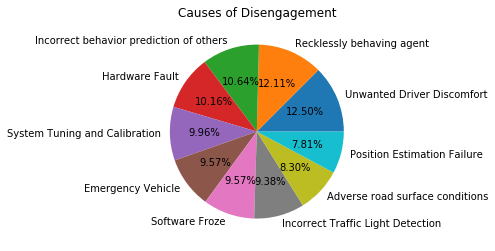

In [250]:
series =pd.Series(diseng['Cause'].values).value_counts()
ax = series.plot(kind='pie',title= 'Causes',autopct='%1.2f%%')
ax.set_ylabel('')
ax.set_title('Causes of Disengagement')

In [251]:
print("1st leading Cause of Disengagement: {0}\t Perecentage: {1}%".format(series.index[0],100*series[0]/sum(series)))
print("2nd leading Cause of Disengagement: {0}\t Perecentage: {1}%".format(series.index[1],100*124/sum(sizes)))

1st leading Cause of Disengagement: Unwanted Driver Discomfort	 Perecentage: 12.5%
2nd leading Cause of Disengagement: Recklessly behaving agent	 Perecentage: 12.109375%


## 4. Visualize the trend of disengagement/mile over time with monthly granularity. How would you describe the trend? Are AV’s maturing over time?

In [252]:
trend = t_miles.groupby('Month').sum().reset_index()
trend['disengagement per mile'] = trend['total number of disengagements']/trend['miles driven in autonomous mode']

Text(0, 0.5, 'disengagement per mile')

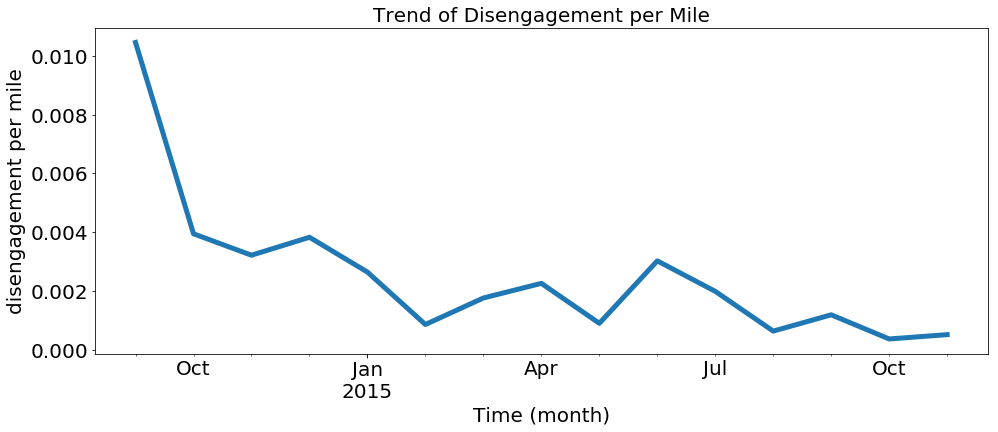

In [253]:
ax = trend.plot(x='Month',y='disengagement per mile',figsize=(16,6), linewidth=5, fontsize=20,legend=False)
ax.set_title('Trend of Disengagement per Mile', fontsize=20)
ax.set_xlabel('Time (month)', fontsize=20)
ax.set_ylabel('disengagement per mile', fontsize=20)

It can be seen that there is a decreasing trend in disengagements per mile. That means that autonomous vehicles are improving with time.

# Task 1 – Basic Analysis of AV Disengagements

## 1. What do the following distributions signify about samples drawn from it

### a. Gaussian distribution

Central Limit theorem

Let $X_1,X_2,...,X_n$ be i.i.d. random variables with expected value $E(X_i)= \mu$ and variance$ 0<Var(X_i)= \sigma^2<\infty$. Then, the random variable
$Z_n= \frac{\bar{X} -\mu}{\sigma/ \sqrt{n}}= \frac{X_1+X_2+...+X_n -n\mu} {n \sqrt{σ}}$
converges in distribution to the standard normal random variable as $n$ goes to infinity

The Gaussian distribution is useful because of the central limit theorem which establishes that, in some situations, when independent random variables are added, their properly normalized sum tends toward a normal distribution regardless of the underlying distribution of the original random variables. So, if we have a sample drawn from a Gaussian distribution, it siginifies that the random variable itself may be a sum of identically distributed independent random variables with some distributions.

PDF: ${\displaystyle f(x\mid \mu ,\sigma ^{2})={\frac {1}{\sqrt {2\pi \sigma ^{2}}}}e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}}}$

### b. Exponential distribution

The exponential distribution (also known as the negative exponential distribution) is the probability distribution that describes the time between events in a Poisson process, that is, a process in which events occur continuously and independently at a constant average rate. Also, exponential distribution exhibits the memorlyess property, i.e., $\Pr(X> m+n \mid X \geq m) = \Pr(X > n)$

PDF: $ f(x;\lambda) = \begin{cases}
\lambda e^{-\lambda x} & x \ge 0, \\
0 & x < 0.
\end{cases}$

### c. Weibull distribution

The probability density function of a Weibull random variable is:
$
{\displaystyle f(x;\lambda ,k)={\begin{cases}{\frac {k}{\lambda }}\left({\frac {x}{\lambda }}\right)^{k-1}e^{-(x/\lambda )^{k}}&x\geq 0,\\0&x<0,\end{cases}}}$

where k > 0 is the shape parameter and $\lambda$ > 0 is the scale parameter of the distribution. Its complementary cumulative distribution function is a stretched exponential function. The Weibull distribution is related to a number of other probability distributions; in particular, it interpolates between the exponential distribution (k = 1) and the Rayleigh distribution (k = 2 and ${\displaystyle \lambda ={\sqrt {2}}\sigma }).$

## 2.  Plot the probability distribution of reaction times. Does this distribution fit any known distributions (Gaussian, Weibull, Exponential)? What does the fit distribution signify?

Text(0, 0.5, 'Frequency')

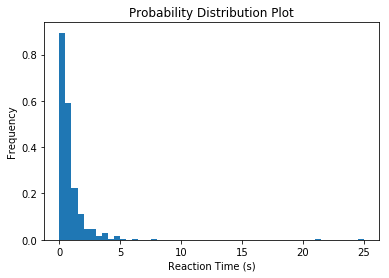

In [254]:
diseng['ReactionTime'].dropna().plot(kind='hist',bins=50,density=True)
plt.title('Probability Distribution Plot')
plt.xlabel('Reaction Time (s)')
plt.ylabel('Frequency')

In [263]:
# reference:
# https://stackoverflow.com/questions/37487830/how-to-find-probability-distribution-and-parameters-for-real-data-python-3

def get_best_distribution(data,dist_names):
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(st, dist_name)
        # fit the distribution and get parameters
        param = dist.fit(data)
        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = st.kstest(data, dist_name, args=param)
        print("p value for "+dist_name+" = "+str(p))
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))

    print("Best fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))

    return best_dist, best_p, params[best_dist]

In [256]:
reaction = diseng['ReactionTime'].dropna().values
dist_names = ['norm','expon','exponweib','gamma']
best_dist, best_p, params=get_best_distribution(reaction,dist_names)

p value for norm = 0.0
p value for expon = 2.931537575268095e-05
p value for exponweib = 0.5797693796632608
p value for gamma = 0.0
Best fitting distribution: exponweib
Best p value: 0.5797693796632608
Parameters for the best fit: (62.13448003707407, 0.304116246270133, -0.09454998901334455, 0.00459917324040706)


Text(0, 0.5, 'Frequency')

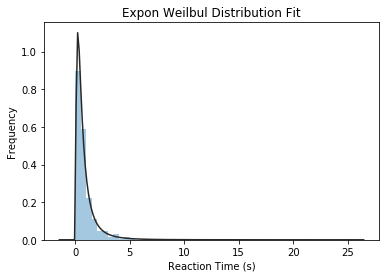

In [257]:
sns.distplot(reaction,fit=stats.exponweib,kde=False)
plt.title('Expon Weilbul Distribution Fit')
plt.xlabel('Reaction Time (s)')
plt.ylabel('Frequency')

## 3. Compute the average reaction time

### a. For the entire duration of the dataset

In [258]:
avg_reaction_time = diseng['ReactionTime'].mean()
print(avg_reaction_time)

0.9297703252032526


### b. For the entire duration of the dataset differentiated by the location of disengagement

In [259]:
avg_reaction_time = diseng.groupby(diseng['Location']).mean()
print(avg_reaction_time)

              ReactionTime
Location                  
highway            1.48000
urban-street       0.92865


## 4. It is known that the mean reaction time for humans in non-AV cars is 1.09 seconds [4]. Is the mean reaction time for humans in AV cars different from non-AV cars? Perform a hypothesis test at a 0.05 significance level.

In [260]:
reaction_time = list(diseng[diseng['ReactionTime'].notnull()]['ReactionTime'])
one_sample = st.ttest_1samp(reaction_time, 1.09)
print("The t-statistic is %.3f and the p-value is %.3f." % one_sample)

if one_sample[1] < 0.05:
    print("The mean reaction time for humans in AV cars is different from non-AV cars.")
else:
    print("The mean reaction time for humans in AV cars is not different from non-AV cars.")

The t-statistic is -2.099 and the p-value is 0.036.
The mean reaction time for humans in AV cars is different from non-AV cars.


## 5. Plot the probability distribution of disengagements/mile with monthly granularity. Does this distribution fit any known distributions (Gaussian, Weibull, Exponential)? What does the fit distribution signify?

Text(0.5, 1.0, 'disengagement per mile')

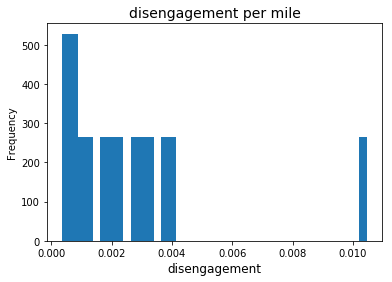

In [261]:
trend['disengagement per mile'].plot(kind='hist',bins=40,density=True)
plt.xlabel('disengagement', fontsize=12)
plt.ylabel('Frequency')
plt.title('disengagement per mile', fontsize=14)

In [230]:
diseng_mile = trend['disengagement per mile'].values
best_dist, best_p, params=get_best_distribution(diseng_mile,dist_names)

p value for norm = 0.471544296974868
p value for expon = 0.9806696005068393
p value for exponweib = 0.0027869462809533285
p value for gamma = 0.21767425026785103
Best fitting distribution: expon
Best p value: 0.9806696005068393
Parameters for the best fit: (0.0003605973188528763, 0.0021407886857360853)


Text(0, 0.5, 'Frequency')

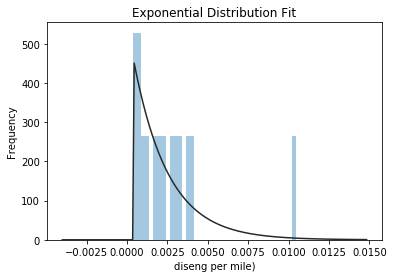

In [262]:
sns.distplot(diseng_mile,bins=40,fit=stats.expon,kde=False)
plt.title('Exponential Distribution Fit')
plt.xlabel('diseng per mile)')
plt.ylabel('Frequency')